In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Muninn format

In [15]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
psi_ori=[]
psi_scri=[]
derpsi_ori=[]
derpsi_scri=[]

for var in vars:
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/{}.txt".format(var)
    
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/{}.txt".format(var)
    
    #dir = "/home/rita13santos/Desktop/run17/{}.txt".format(var)
    #dir = "/home/rita13santos/Desktop/run14/{}.txt".format(var)
    
    #dir = "/home/rita13santos/Desktop/run11/{}.txt".format(var)
    
    dir = "/home/rita13santos/Desktop/27sep/18jul/run3/{}.txt".format(var)
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/08-06/res1/{}.txt".format(var)
    
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/30-05/run20/res1/{}.txt".format(var)
    #dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/28-06/N200,dt=2.5e-5/res1/{}.txt".format(var)
    print(dir)
    t=0
    with open(dir) as f:
        for line in f:

            index = line.find("Time")
            
            if index==1:
                t=t+1
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                    
                elif a==[]:
                    
                    
                    if k==1:
                        if t==1:
                            grid.append(auxgrid)
                        L=len(auxgrid)
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[L-4])
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[L-4])
                    elif k==3:
                        psi_ori.append(auxdata[3])
                        psi_scri.append(auxdata[L-4])
                    elif k==4:
                        derpsi_ori.append(auxdata[3])
                        derpsi_scri.append(auxdata[L-4])
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/29sepfieldplot/super/m.txt
/home/rita13santos/Desktop/29sepfieldplot/super/beta.txt
/home/rita13santos/Desktop/29sepfieldplot/super/psi.txt
/home/rita13santos/Desktop/29sepfieldplot/super/derpsi.txt


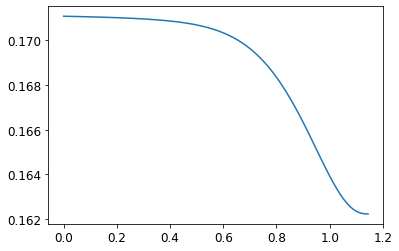

In [16]:
plt.plot(time,m_scri)

####

# Styling plots

In [4]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Convert central time to Bondi time

In [5]:

#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

#convert central time to bondi time
def converttobondi(time, beta_scri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(beta_scri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

bonditime=converttobondi(time,beta_scri)

# Phi at origin

Value of Derpsi at the origin over time

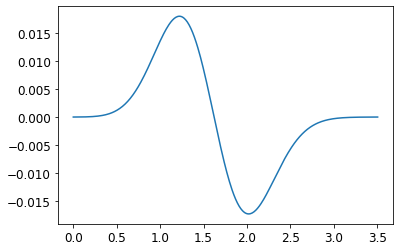

In [6]:
plt.plot(time, derpsi_ori)

In [7]:
derpsi_ori

[0.0,
 4.9008246389e-07,
 1.0985533141e-06,
 1.8424669426e-06,
 2.7407790286e-06,
 3.8143659655e-06,
 5.0861221596e-06,
 6.5811106466e-06,
 8.3267323894e-06,
 1.0352891153e-05,
 1.2692150032e-05,
 1.5379887124e-05,
 1.845445727e-05,
 2.1957360657e-05,
 2.5933414946e-05,
 3.0430927993e-05,
 3.5501870388e-05,
 4.1202048164e-05,
 4.7591275422e-05,
 5.4733545628e-05,
 6.269720004e-05,
 7.1555092034e-05,
 8.1384746305e-05,
 9.2268511834e-05,
 0.0001042937072,
 0.00011755275669,
 0.00013214331555,
 0.00014816838297,
 0.00016573640106,
 0.00018496133819,
 0.00020596275478,
 0.00022886584979,
 0.00025380148596,
 0.000280906192,
 0.00031032213976,
 0.00034219709438,
 0.0003766843356,
 0.00041394254821,
 0.00045413567964,
 0.00049743276314,
 0.00054400770433,
 0.00059403902965,
 0.00064770959492,
 0.00070520625245,
 0.00076671947526,
 0.00083244293713,
 0.00090257304713,
 0.00097730843791,
 0.0010568494066,
 0.0011413973082,
 0.0012311539003,
 0.0013263206395,
 0.0014270979304,
 0.0015336843252,

Finding zero crossings

In [8]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derpsi_ori, s=0)

roots=spl.roots()
print("Number of zero crossing is ",len(roots))
print(roots[k:(k+3)+1])

k=0
tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report")

Number of zero crossing is  1
[]


IndexError: index 3 is out of bounds for axis 0 with size 1

In [9]:
#tau_star=2.28

In [10]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

NameError: name 'tau_star' is not defined

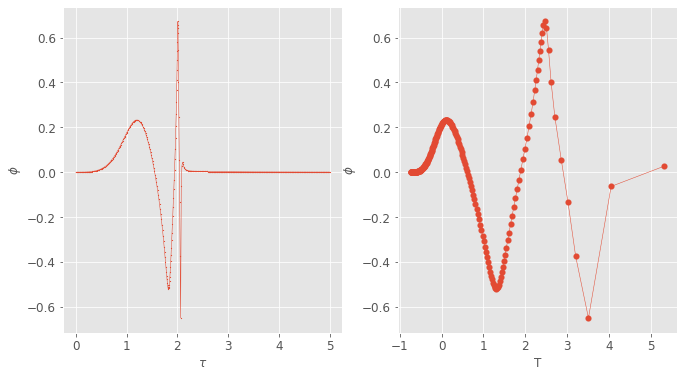

In [68]:
with plt.style.context('ggplot'):
    """plt.rcParams.update({'font.size': 12})    
    plt.rcParams["figure.figsize"] = (7,5)"""
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,derpsi_ori,linewidth=0.5)
    ax1.scatter(time,derpsi_ori,s=0.5)
    ax1.set_xlabel("$\u03C4$")
    ax1.set_ylabel("$\phi$")
    #ax1.set_xlim([2.04,2.05])
    
    ax2.plot(adapt_time,derpsi_ori[0:len(adapt_time)],linewidth=0.5)
    ax2.scatter(adapt_time,derpsi_ori[0:len(adapt_time)],linewidth=0.1)
    ax2.set_xlabel("T")
    ax2.set_ylabel("$\phi$")
    
    
    
    plt.show()

Value of Derpsi at the origin over time

In [7]:
derpsiplt=[]
for i in range(0, len(derpsi)):
    derpsiplt.append(derpsi[i][3]) #saving derpsi at the origin for each timestep


Finding zero crossings

In [3]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(time, derpsiplt, s=0)

roots=spl.roots()
len(roots)

NameError: name 'time' is not defined

In [1]:
k=2
tau_star=(roots[0+k]*roots[3+k]-roots[1+k]*roots[2+k])/(roots[0+k]-roots[1+k]-roots[2+k]+roots[3+k])
print("\nTau star is ", tau_star)
print("Tau* is u* in my report") #all my times tau (proper time) and substituted by u

Delta=2*math.log((tau_star-roots[k])/(tau_star-roots[k+1]))
print("\nDelta is ", Delta)

NameError: name 'roots' is not defined

In [ ]:
roots[k:(k+3)+1]

In [2]:
#adapt_time = [-math.log(abs((tau_star-x))) for x in time[0:len(time)-1]]#0:len(time)-step:step]] #ignoring last timestep, where log(0)

adapt_time=[]

for x in time:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))

NameError: name 'time' is not defined

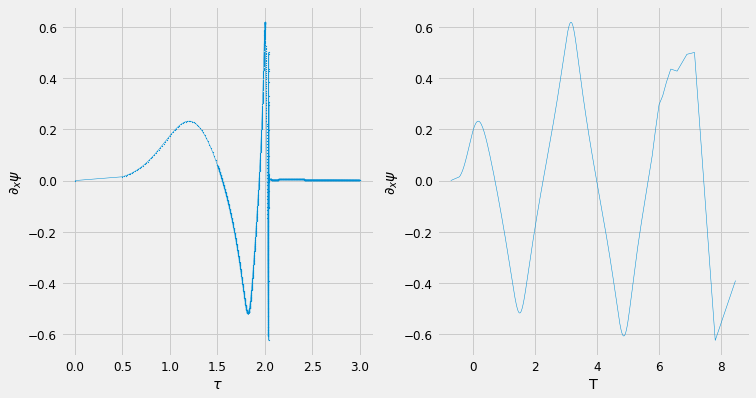

In [57]:
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,derpsiplt,linewidth=0.5)
    ax1.scatter(time,derpsiplt,s=0.5)
    ax1.set_xlabel("Proper time $\u03C4$")
    ax1.set_ylabel("$\phi$")
    #ax1.set_xlim([1.9,2.09])
    
    ax2.plot(adapt_time,derpsiplt[0:len(adapt_time)],linewidth=0.5)
    ax2.set_xlabel("Similarity time T")#Adapted time T")
    ax2.set_ylabel("$\phi$")
    
    
    
    plt.show()

News function

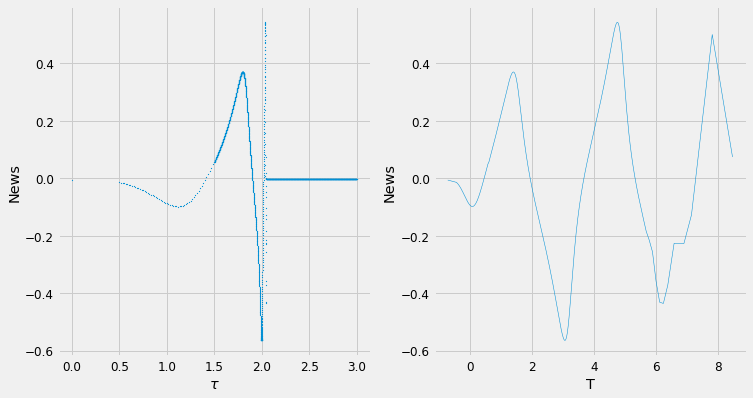

In [58]:
psiplt=[]
for i in range(0, len(psi)):
    psiplt.append(psi[i][len(psi[0])-4]) #saving derpsi at scri for each timestep

news=[]
for i in range(0, len(psiplt)-1):
    new=(psiplt[i+1]-psiplt[i])/(time[i+1]-time[i])
    news.append(new)

    
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.scatter(time[0:len(news)],news,s=0.5)
    ax1.set_xlabel("Bondi time $u_B$")#$\u03C4$")
    ax1.set_ylabel("News")
    
    ax2.plot(adapt_time[0:len(adapt_time)],news[0:len(adapt_time)],linewidth=0.5)
    ax2.set_xlabel("Similarity time T")#Adapted time T")
    ax2.set_ylabel("News")
    
    
    
    plt.show()

Monitor ratio over time

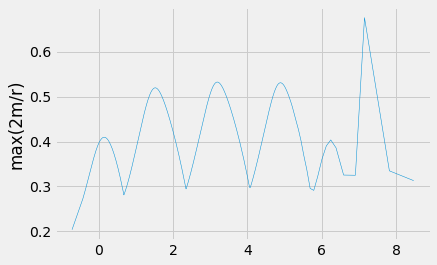

In [59]:
L=len(m[0])

monitor_ratio=[]
for t in range(0,len(m)-1):
    aux=[]
    for x in range(4,L-3):
        aux.append(2*m[t][x]*(1-grid[t][x])/grid[t][x])
    monitor_ratio.append(max(aux))
    

with plt.style.context('ggplot'):
    #plt.plot(time[0:len(time)-1],monitor_ratio,linewidth=0.5)
    plt.plot(adapt_time,monitor_ratio[0:len(adapt_time)],linewidth=0.5)
    plt.ylabel("max(2m/r)")
    plt.show()

$\beta$ at scri+

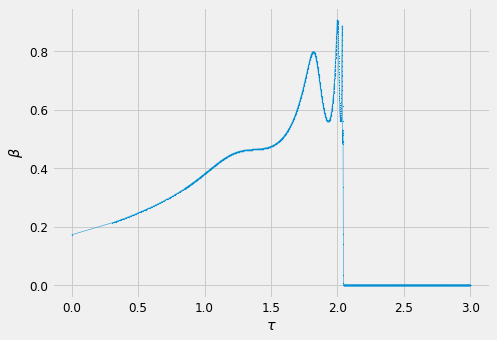

In [67]:
betaplt=[]
for i in range(0, len(derpsi)):
    betaplt.append(beta[i][len(beta[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('ggplot'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)  
    plt.xlabel("$\u03C4$")#T
    plt.ylabel(r'$ \beta $')
    plt.plot(time,betaplt,linewidth=0.5)
    plt.scatter(time,betaplt,s=0.5)
    #plt.plot(adapt_time,mplt[0:len(adapt_time)],linewidth=0.5)
    #plt.xlim([1,1.05])
    plt.show()

Redshift factor

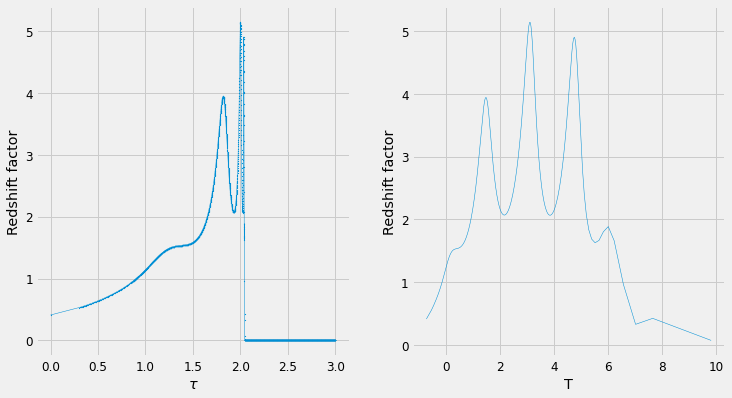

In [69]:
redshift=[]
for i in range(0, len(beta)):
    redshift.append(math.exp(2*beta[i][len(beta[0])-4])-1) #saving derpsi at the origin for each timestep

    
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))

    ax1.plot(time,redshift,linewidth=0.5)
    ax1.scatter(time,redshift,s=0.5)
    ax1.set_xlabel("$\u03C4$")
    ax1.set_ylabel("Redshift factor")
    
    ax2.plot(adapt_time[0:len(adapt_time)],redshift[0:len(adapt_time)],linewidth=0.5)
    ax2.set_xlabel("T")
    ax2.set_ylabel("Redshift factor")
    
    
    
    plt.show()

Bondi mass at scri+

ValueError: x and y must be the same size

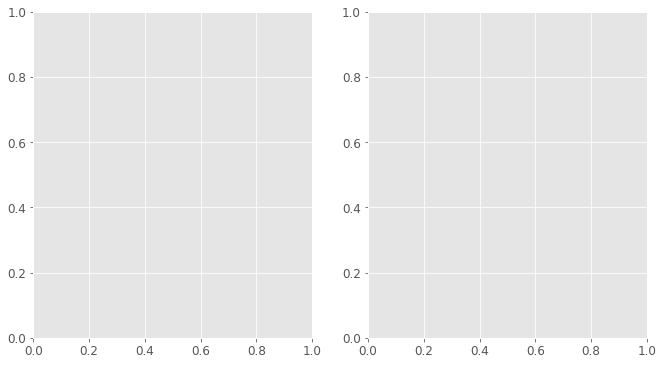

In [11]:
mplt=[]
for i in range(0, len(derpsi)):
    mplt.append(m[i][len(m[0])-4]) #saving derpsi at the origin for each timestep

with plt.style.context('ggplot'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11, 6))
    
    
    
    
    # time
    ax1.scatter(time,mplt,s=0.5)
    ax1.plot(time,mplt,linewidth=0.5)
    ax1.set_ylabel("Bondi mass")
    #ax1.set_xlim([.8,1.04])
    #ax1.set_ylim([-0.001,0.002])
    ax1.set_yscale('log')
    ax1.set_xlabel("$\u03C4$")#T
    
    # adapt time
    
    ax2.plot(adapt_time,np.array(mplt[0:len(adapt_time)]),linewidth=0.5)
    ax2.set_yscale('log')
    #ax2.set_xlim([2.55,2.6])
    #ax2.set_ylim([-0.001,0.001])
    ax2.set_ylabel("Bondi mass")
    ax2.set_xlabel("T")
    
    plt.show()

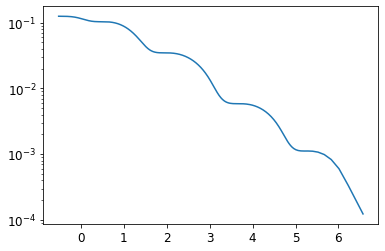

In [84]:
plt.plot(adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]))
plt.yscale('log')

In [1]:
#import numpy as np

#import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x,a,b):
    return a + b*x

In [3]:
import numpy as np
f=np.vectorize(func)


# fit
guess = [0.1,-0.5]

pars, cov = curve_fit(f, adapt_time[10:len(adapt_time)-3],np.array(mplt[10:len(adapt_time)-3]), p0=guess, maxfev=5000)

pars

#plt.plot(t[600:1400], f(t[600:1400],pars[0],pars[1],pars[2],pars[3]))
#plt.scatter(t[600:1400],monitor_ratio[600:1400])
#plt.show()

NameError: name 'adapt_time' is not defined

psi(tau)

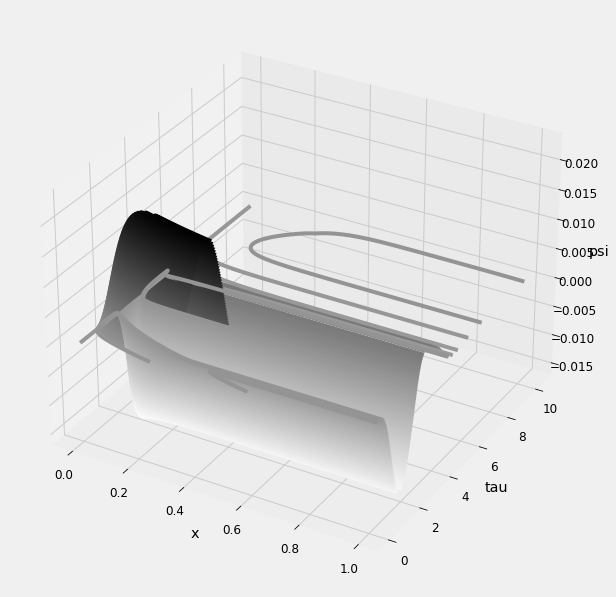

In [30]:
x = grid[0][3:len(grid[0])-3]
y = t

X, Y = np.meshgrid(x, y)

Z = []

for i in range(0,len(y)):
    Z.append(psi[i][3:len(grid[0])-3])

with plt.style.context('ggplot'):
    
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (10,10)  

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 100, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('psi');